In [3]:
import pandas as pd
import seaborn as sns #לגרפים
import matplotlib.pyplot as plt #מפות
!pip install plotly 
import plotly.express as px  #similar to seaborn
import plotly.graph_objects as go #more complex and customizable
import numpy as np #חישובים מתמטיים מטריצות וכו
import requests
from IPython.display import Image

In [10]:
url ="C:\\Users\\Hila\\OneDrive\\Engineering_graduate_salary (1).csv"
pj = pd.read_csv(url)
pj.shape

(2998, 34)

In [11]:
#מתחילים מסקנה 3:

In [12]:
#שכר ממוצע במכללה 1 ומכללה 2 (אצל נויה)

In [13]:
#  נראה שלמרות שממוצע השכר ב1 גבוה בהרבה מב2 השכר המקסימלי זהה

In [14]:
# חישוב השכר המקסימלי עבור כל רמת מכללה
max_salary_by_tier = pj.groupby('CollegeTier')['Salary'].max().reset_index()
max_salary_by_tier.columns = ['College Tier', 'Max Salary']

# הצגת התוצאות
(max_salary_by_tier)

,College Tier,Max Salary
0,1,4000000
1,2,4000000


In [15]:
#כמות הלומדים במכללה 1 ומכללה 2 (אצל נויה)

In [16]:
#למרות שממוצע השכר של מי שלמד במכללה 1 גבוה יותר, רוב האנשים לומדים במכללה 2תדבר זה הפתיע אותנו אז רצינו לחקור למה קורה כך..

In [17]:
#בתחילה רצינו לבדוק האם יש לציונים קשר לכך

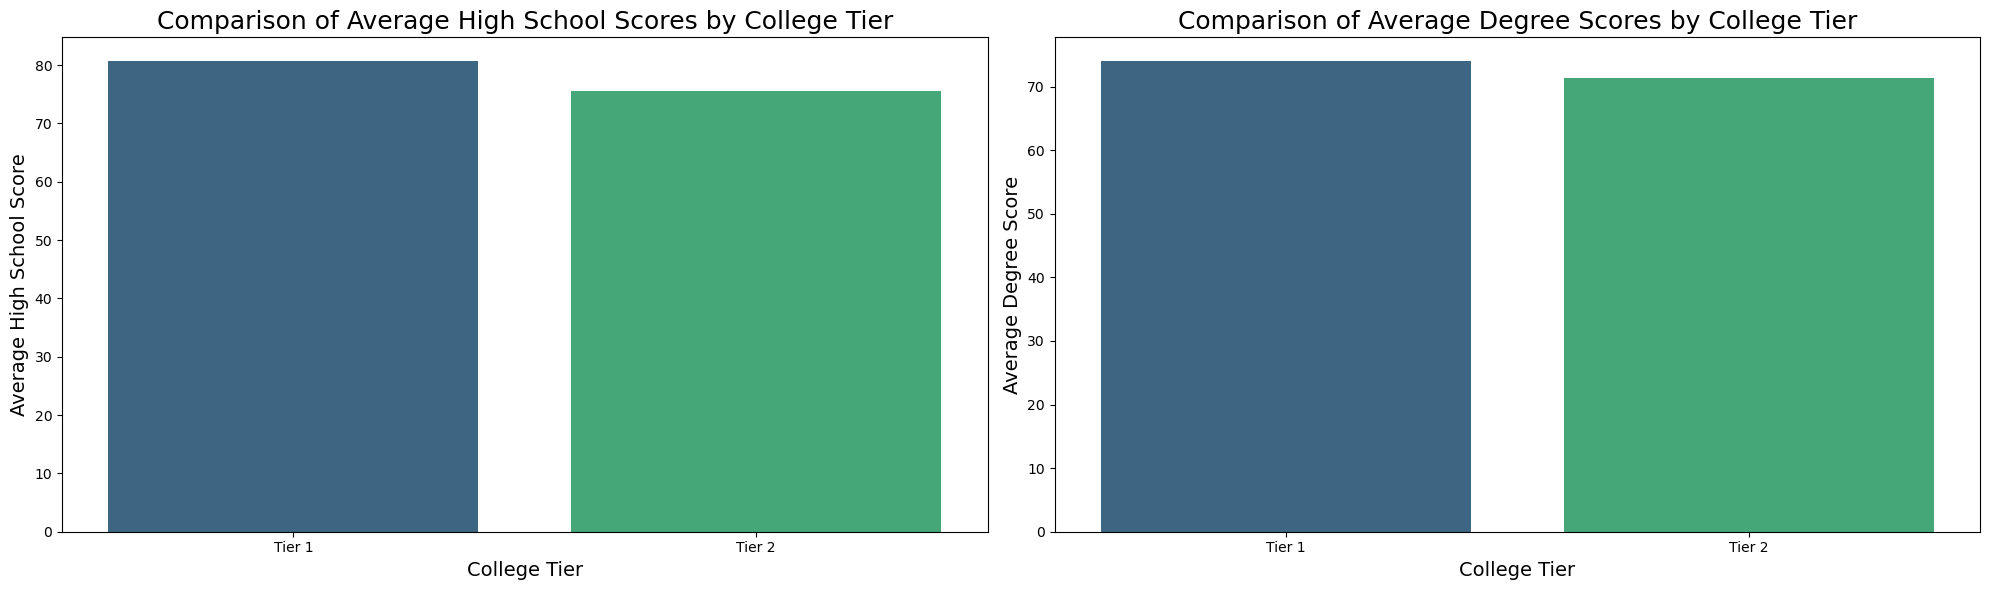

In [19]:
average_high_school_score_tier_1 = pj[pj['CollegeTier'] == 1][['10percentage', '12percentage']].mean(axis=1).mean()
average_high_school_score_tier_2 = pj[pj['CollegeTier'] == 2][['10percentage', '12percentage']].mean(axis=1).mean()

# חישוב ממוצע ציוני התואר עבור מכללות ברמה 1 וברמה 2
average_degree_score_tier_1 = pj[pj['CollegeTier'] == 1]['collegeGPA'].mean()
average_degree_score_tier_2 = pj[pj['CollegeTier'] == 2]['collegeGPA'].mean()

# יצירת גרף עם שני הגרפים זה לצד זה
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# גרף ממוצע ציוני כיתה י' וכיתה י"ב יחד
sns.barplot(x=['Tier 1', 'Tier 2'], y=[average_high_school_score_tier_1, average_high_school_score_tier_2], palette='viridis', ax=axes[0])
axes[0].set_title('Comparison of Average High School Scores by College Tier', fontsize=18)
axes[0].set_ylabel('Average High School Score', fontsize=14)
axes[0].set_xlabel('College Tier', fontsize=14)

# גרף ממוצע ציוני התואר
sns.barplot(x=['Tier 1', 'Tier 2'], y=[average_degree_score_tier_1, average_degree_score_tier_2], palette='viridis', ax=axes[1])
axes[1].set_title('Comparison of Average Degree Scores by College Tier', fontsize=18)
axes[1].set_ylabel('Average Degree Score', fontsize=14)
axes[1].set_xlabel('College Tier', fontsize=14)

plt.tight_layout()
plt.show()


In [20]:
#ניתן לראות בצורה ברורה שהציונים של מכללה 1 גבוהים יותר.הן בתיכון והן בסיום התואר..המשכנו לבדוק האם הם חזקים במשהו מסויים..

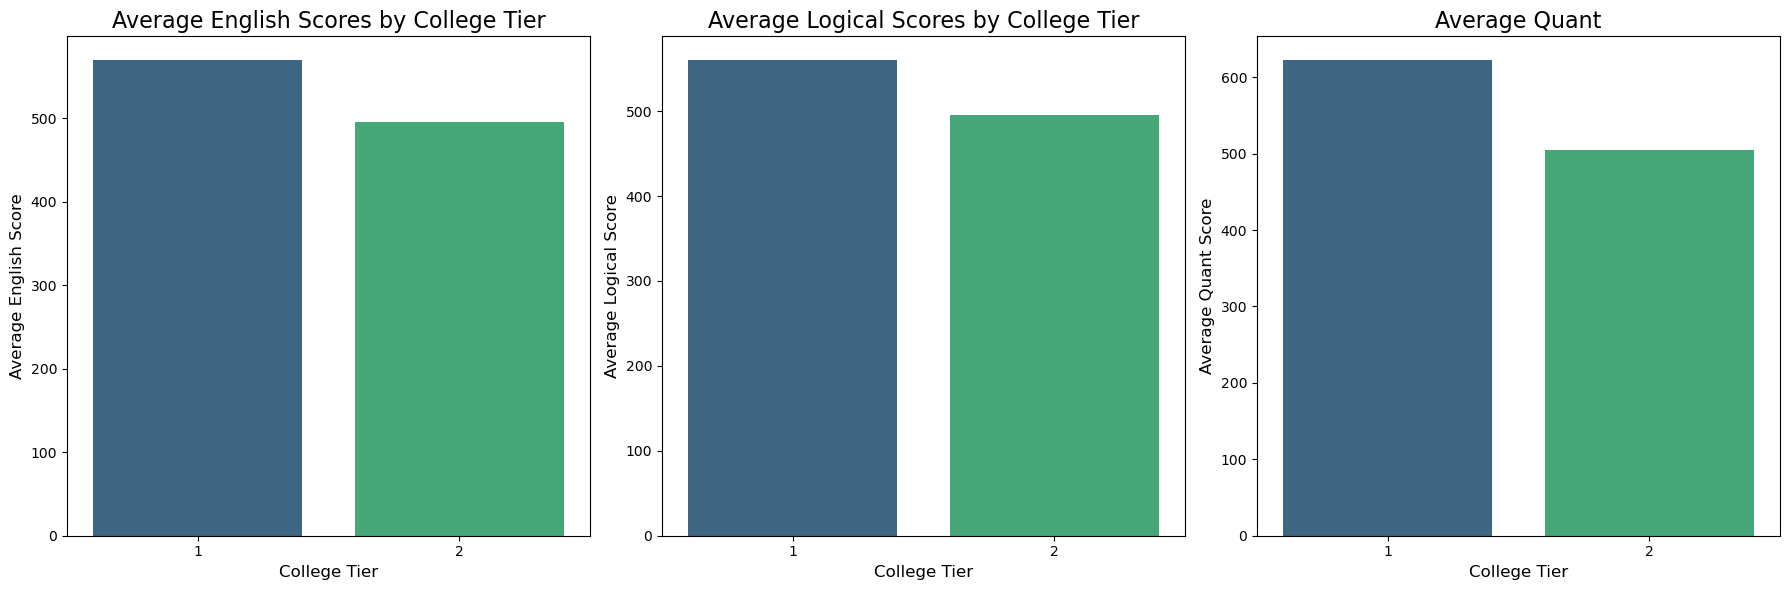

In [22]:
# חישוב ממוצע ציוני האנגלית, הלוגיקה והכמותי לפי רמת מכללה
average_scores_by_tier = pj.groupby('CollegeTier')[['English', 'Logical', 'Quant']].mean().reset_index()
average_scores_by_tier.columns = ['College Tier', 'Average English Score', 'Average Logical Score', 'Average Quant Score']

# יצירת גרף של ממוצע הציונים באנגלית, לוגיקה וכמותי לפי רמת מכללה
plt.figure(figsize=(18, 6))

# גרף ממוצע ציוני האנגלית
plt.subplot(1, 3, 1)
sns.barplot(data=average_scores_by_tier, x='College Tier', y='Average English Score', palette='viridis')
plt.title('Average English Scores by College Tier', fontsize=16)
plt.ylabel('Average English Score', fontsize=12)
plt.xlabel('College Tier', fontsize=12)

# גרף ממוצע ציוני הלוגיקה
plt.subplot(1, 3, 2)
sns.barplot(data=average_scores_by_tier, x='College Tier', y='Average Logical Score', palette='viridis')
plt.title('Average Logical Scores by College Tier', fontsize=16)
plt.ylabel('Average Logical Score', fontsize=12)
plt.xlabel('College Tier', fontsize=12)

# גרף ממוצע ציוני הכמותי
plt.subplot(1, 3, 3)
sns.barplot(data=average_scores_by_tier, x='College Tier', y='Average Quant Score', palette='viridis')
plt.title('Average Quant', fontsize=16)
plt.ylabel('Average Quant Score', fontsize=12)
plt.xlabel('College Tier', fontsize=12)

plt.tight_layout()
plt.show()


בכל התחומים הממוצעים של מכללה 1 טובים יותר משל מכללה 2, מכאן הסקנו כי מכללה 1 נחשבת טובה יותר
אליה מתקבלים רק האנשים עם הציונים הטובים שיכולים ומסוגלים להמשיך בקו זה ולהוציא גם בתואר ובמבחן שלאחר מכן ציונים טובים

In [24]:
#ובשל כך יש יותר אנשים במכללה ברמה 2,לא כולם יכולים להגיע ל1
#דבר זה יותר קשה ולא לכולם בר השגה

In [25]:
#המשכנו לבדוק האם עניין זה שונה בין מחוזות

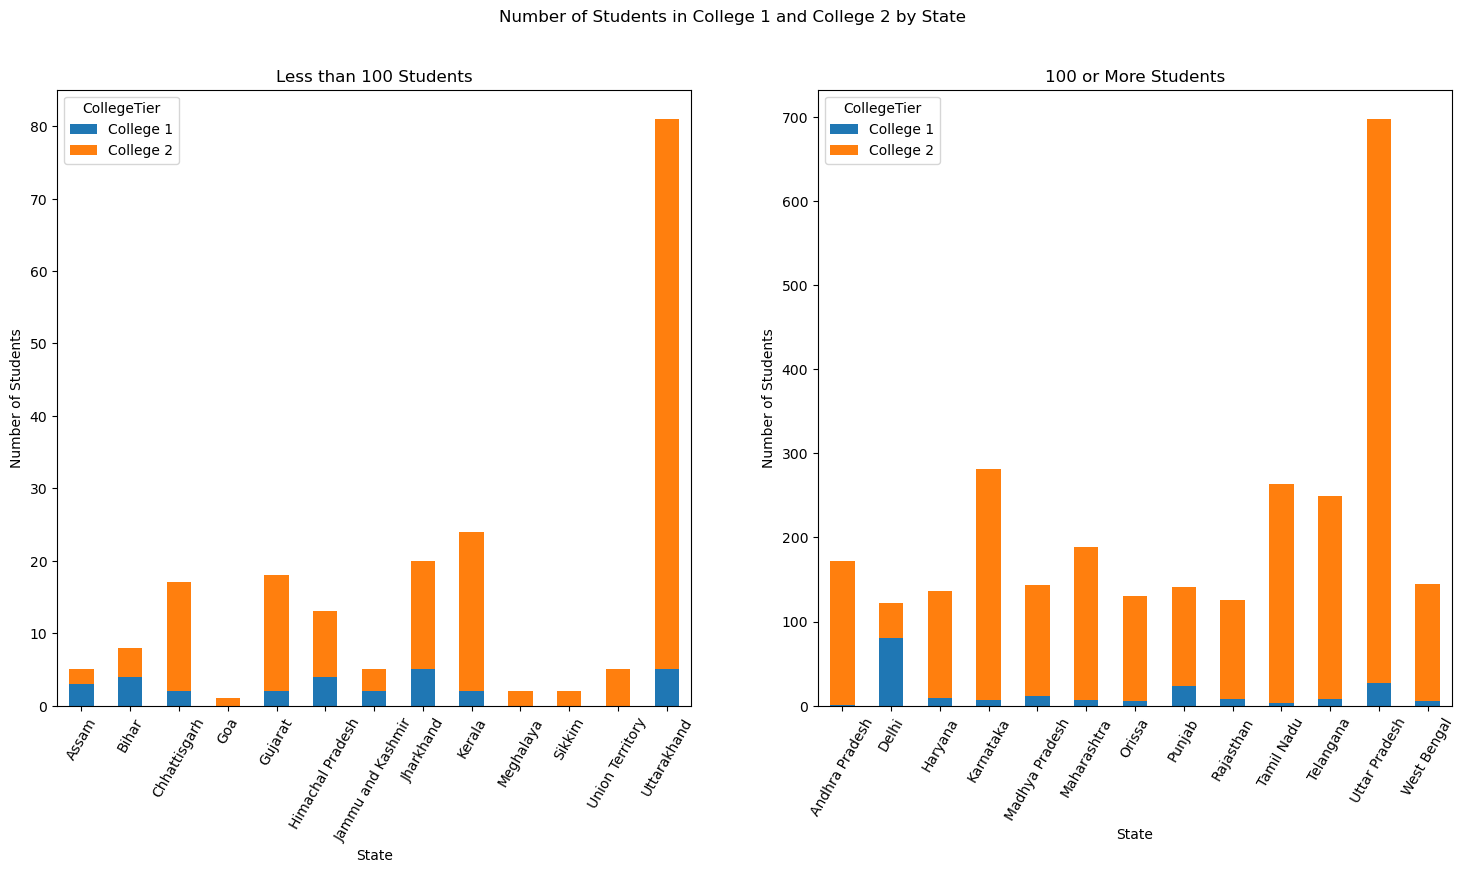

In [34]:
# חישוב מספר הסטודנטים בכל מחוז
state_counts = pj['CollegeState'].value_counts()

# חלוקה לשתי קבוצות: פחות מ-100 סטודנטים ו-100 או יותר סטודנטים
less_than_100 = state_counts[state_counts < 100].index
more_than_100 = state_counts[state_counts >= 100].index

# יצירת גרפים
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# גרף מחוזות עם פחות מ-100 סטודנטים
pj[pj['CollegeState'].isin(less_than_100)].groupby(['CollegeState', 'CollegeTier']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Less than 100 Students')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Students')
axes[0].tick_params(axis='x', rotation=60)

# גרף מחוזות עם 100 או יותר סטודנטים
pj[pj['CollegeState'].isin(more_than_100)].groupby(['CollegeState', 'CollegeTier']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('100 or More Students')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Number of Students')
axes[1].tick_params(axis='x', rotation=60)

# כותרת כללית ופריסה
plt.suptitle('Number of Students in College 1 and College 2 by State')
plt.show()


ניתן לראות בצורה בולטת מאד שכמות הלומדים במכללה 2 בכל מחוז ומחוז גדול מהלומדים במכללה #,
דבר זה אינו מפתיע אותנו הריי כך סברנו בהתאם למסקנה הנ"ל
אך הופתענו לגלות שיש מחוזות בהם כלל אין לומדים במכללות סוג 1.
לאחר בדיקה על מקומות אלו-
Goa
Meghalaya
Sikkim 
Union Territory
גילינו כי אלו מחוזות חלשים בהודו, מדינות לא מתקדמות הסקנו מכך שכנראה אין להם משאבים, אנרגיות ויכולות להשקיע בלימודים ולכן הם מקבלים ציונים נמוכים ואינם יכולים להיות במכללות ברמה 1 

המחוז היחיד בה כמות האנשים הלומדים במכללה "השווה יותר" גדול יותר הוא דאלי- זהו המחוז החזק ביותר בהודו,מדינת הבירה. לכן הכלכלה שם וההשקעה בציונים ובלמידה היא גבוהה מאד